## Place Cell Analysis 

## Goal #1: Detect place cells? Cells that have a preference to locations on the track.

## Goal #2: Look at the formation of place cells. Is there a burst of activity that indicates the beginning or formation of a place field? Can consider looking at the data in reverse, from end to beginning.

## Goal #3: Are place cells stable over time? Across days or even remapping during the same session?

In [172]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mat = scipy.io.loadmat('../../../CaImAn/demos/notebooks/Results/02-03cnmfe.mat')

# mat = scipy.io.loadmat('../../../CaImAn/demos/notebooks/Results/01-27cnmfe.mat')

#TODO: linearize position
# TODO: get correct frames of miniscope data


In [179]:
# Load Frames and Time Stamps


load_behavior = 'TimeSync/behavior_frames_02_03.npy'
load_miniscope = 'TimeSync/miniscope_frames_02_03.npy'
load_t_behavior = 'TimeSync/t_behavior_02_03.npy'
load_t_miniscope = 'TimeSync/t_miniscope_02_03.npy'

behavior_frames = np.load(load_behavior)
behavior_frames = behavior_frames - 932 # Fixing because Behavior Tracking Started at 932
miniscope_frames = np.load(load_miniscope)
t_behavior = np.load(load_t_behavior)
t_miniscope = np.load(load_t_miniscope)

## Behavior and Calcium Data

Num Frames: 26031 26031
Behavior Sync Frames =  26031


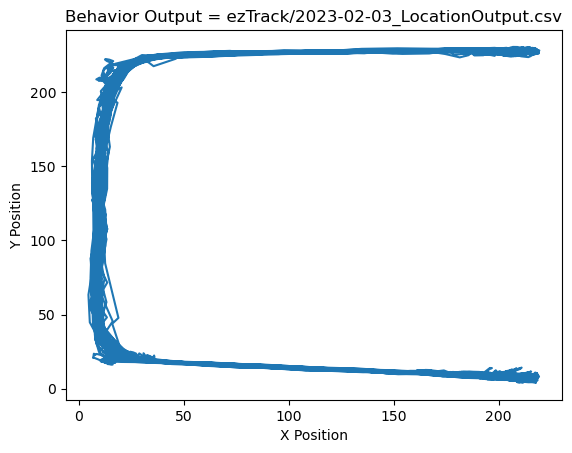

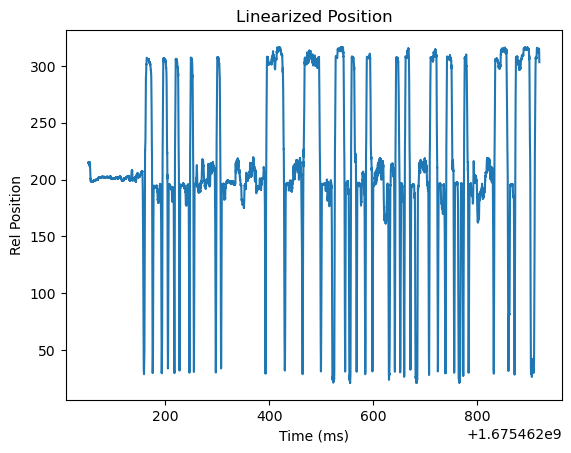

In [213]:
import csv
# Load Raw Behavior Data
csv_fname = "ezTrack/2023-02-03_LocationOutput.csv"
file = open(csv_fname)
csvreader = csv.reader(file)
pos_x = []
pos_y = []
for row in csvreader:
    if row[7] != 'X': # skip the first row
        pos_x.append(float(row[7])) 
        pos_y.append(float(row[8]))
        
# Removing Out of Sync Behavior Frames
pos_x = [pos_x[f] for f in behavior_frames]
pos_y = [pos_y[f] for f in behavior_frames]

print("Num Frames:", len(pos_x), len(pos_y))
print("Behavior Sync Frames = ", len(behavior_frames))

plt.plot(x, y)
plt.title("Behavior Output = " + csv_fname)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

# Linearize Position of Rat
pos_relative = np.sqrt(np.square(pos_x) + np.square(pos_y))

plt.plot(t_behavior, pos_relative[:-1])
plt.title("Linearized Position")
plt.xlabel("Time (ms)")
plt.ylabel("Rel Position")
plt.show()

In [220]:
# TODO: get correct frames of miniscope data

d = mat['C']

data = [d[f] for f in miniscope_frames]


x_normed = (data-np.min(data))/(np.max(data)-np.min(data))

print(np.shape(x_normed))
plt.plot(x_normed.T)
plt.title("Normalized Cells (n = " + str(np.shape(x_normed)[0]) + ")")
plt.show()

IndexError: index 8144 is out of bounds for axis 1 with size 8144

In [222]:
np.shape(d[100])

(8144,)

(106, 7535)


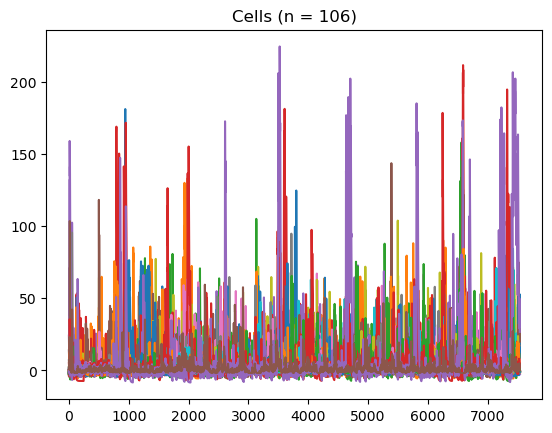

In [166]:
print(np.shape(data))
plt.plot(data.T)
plt.title("Cells (n = " + str(np.shape(data)[0]) + ")")
plt.show()

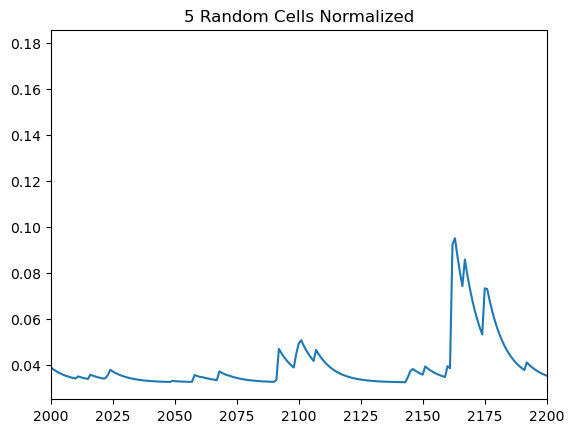

In [171]:
randos = np.random.randint(1,101,1)

for i in randos:
    plt.plot( x_normed[i])

plt.title("5 Random Cells Normalized")
plt.gca().set_xlim(2000,2200)
plt.show()


In [162]:
# plt.plot(x, x_normed[0])
# plt.show()

In [173]:
mat

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Mar  3 17:20:50 2023',
 '__version__': '1.0',
 '__globals__': [],
 'A': <22500x106 sparse matrix of type '<class 'numpy.float64'>'
 	with 19612 stored elements in Compressed Sparse Column format>,
 'fullA': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'C': array([[-0.37967752, -0.53161536, -0.19321395, ...,  3.02866831,
          2.41975372,  1.89247984],
        [-1.06170469, -1.53386887,  0.08076817, ...,  4.19365666,
          7.43483343, 15.91341482],
        [ 0.44134074,  0.24583214,  0.96483318, ..., -0.5800315 ,
         -0.6104356 , -0.63592487],
        ...,
        [ 4.93516426,  3.94004902,  3.02583087, ...,  5.3732517 ,
          8.10321967,  6.85056183],
        [-1.53818845, -0.02765441, -0.70408308, .

## Past Code

In [4]:
# import scipy.io
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy import stats

# mat = scipy.io.loadmat('2023-01-16/synced_activity.mat')

In [20]:
# # Getting some sample neurons

# n1 = np.array(mat['n1'][0].tolist())
# n10 = np.array(mat['n10'][0].tolist())
# n25 = np.array(mat['n25'][0].tolist())
# n33 = np.array(mat['n33'][0].tolist())
# n45 = np.array(mat['n45'][0].tolist())

In [22]:
# xvals = np.array(mat['xvals'][0].tolist())
# yvals = np.array(mat['yvals'][0].tolist())

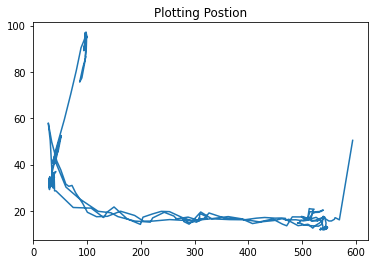

In [41]:
# plt.plot(xvals,yvals)
# plt.title("Plotting Postion")
# plt.show()

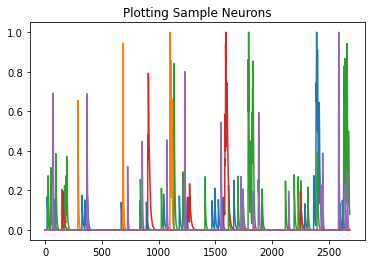

In [42]:
# # Maybe a good idea to normalize fluoresence data
# # Could be across all neurons, or per ROI

# def normalize(x):
#     x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
#     return x_norm

# plt.plot(normalize(n1))
# plt.plot(normalize(n10))
# plt.plot(normalize(n25))
# plt.plot(normalize(n33))
# plt.plot(normalize(n45))
# plt.title("Plotting Sample Neurons")
# plt.show()

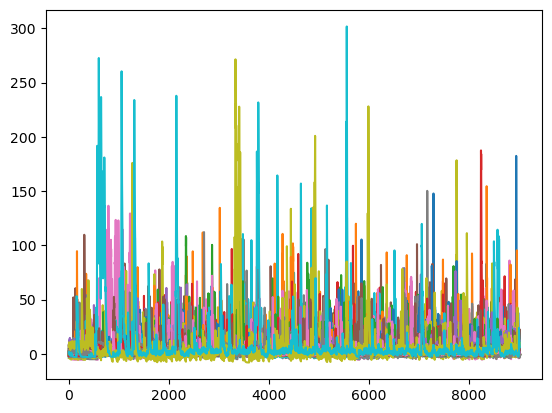

In [21]:
# data = mat['C'].T

# def normalize(x):
#     x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
#     return x_norm

# data_norm = 

# plt.plot(mat['C'].T)
# plt.show()

In [39]:
# # How does correlation between neurons look? - might want this to be low, because a high correlation implies ROIs are overlapping too much?

# # Y and Z are numpy arrays or lists of variables 
# print(stats.pearsonr(n1, n10))
# print(stats.pearsonr(n1, n25))
# print(stats.pearsonr(n1, n45))

# # Result comes out as
# # (statistic, p-value)

(-0.02450705551183939, 0.20426953626266808)
(0.033739656216065624, 0.08046907848644032)
(-0.009034803927898745, 0.6398218775276494)
